# Import Libraries

In [169]:
# classification algorithms
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS

# data structures
import numpy as np
import pandas as pd
import json

# data viz and other
import random
import matplotlib.pyplot as plt

# nlp stack
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.externals import joblib

from lib.Functions import *

In [170]:
random.seed(100) # For reproducibility 

# Data Import

In [171]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org   
text_0 = nltk.corpus.gutenberg.raw('austen-emma.txt')
text_1 = nltk.corpus.gutenberg.raw('blake-poems.txt')
text_2 = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')
text_3 = nltk.corpus.gutenberg.raw('carroll-alice.txt')
text_4 = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

# Pre-processing
- Tokenization
- Word Stemming/Lemmatization
- Remove stop words

In [172]:
austen = select_random_para(create_para(stem_lem_words(tokenize(text_0))))  # ,para_size=50
blake = select_random_para(create_para(stem_lem_words(tokenize(text_1))))
shakespeare = select_random_para(create_para(stem_lem_words(tokenize(text_2))))
carroll = select_random_para(create_para(stem_lem_words(tokenize(text_3))))
melville = select_random_para(create_para(stem_lem_words(tokenize(text_4))))

In [173]:
austen

['granted private enjoyment private enjoyment keep le written know divide couplet cease meaning change take away appropriation cease pretty gallant charade remains fit collection depend upon would like charade slighted much better passion poet love must encouraged capacity neither give book write possible reflection harriet submitted though mind could hardly separate part feel quite sure friend writing declaration love seemed precious offering degree publicity shall never let book go hand said well replied emma natural feeling longer last better shall pleased father coming object reading charade giving much pleasure love thing sort especially thing pay woman compliment tenderest spirit gallantry towards u must let read harriet looked grave dear harriet must refine much upon charade betray feeling improperly conscious quick appear affix meaning even quite meaning may affixed overpowered little tribute admiration anxious secrecy would left paper rather pushed towards towards let u solemn

In [163]:
training_data = austen + blake + shakespeare + carroll + melville
label_data = pd.DataFrame(["austen"] * len(austen) + ["blake"] * len(blake) + ["shakespeare"] * len(shakespeare) + ["carroll"] * len(carroll) + ["melville"] * len(melville))
label_data.columns = ['target_value']

print("austen:",len(austen),"\nblake:",len(blake),"\nshakespeare:",len(shakespeare),"\ncarroll:", len(carroll),"\nmelville",len(melville))

#joblib.dump(training_data, 'training_data.pkl')
#joblib.dump(label_data, 'label_data.pkl')

austen: 200 
blake: 25 
shakespeare: 72 
carroll: 80 
melville 200


# Feature Engineering

### LDA

In [168]:
d1 = stem_lem_words(tokenize(text_0))

In [144]:
text_data = []
for line in training_data:
    tokens = tokenize(line)
    if random.random() > .99:
        print(tokens)
        text_data.append(tokens)

['nothing', 'encounter', 'mr', 'churchill', 'independent', 'wife', 'feared', 'nobody', 'easy', 'guidable', 'man', 'persuaded', 'thing', 'nephew', 'remained', 'wished', 'nephew', 'form', 'attachment', 'goodwill']
['loved', 'even', 'mr', 'elton', 'vain', 'surrender', 'dangerous', 'pleasure', 'knowing', 'beloved', 'husband', 'friend', 'large', 'party', 'necessary', 'emma', 'approach', 'wish', 'speak', 'pianoforte']
['marke', 'antony', 'cassi', 'brutus', 'word', 'know', 'consent', 'antony', 'speake', 'funerall', 'know', 'much', 'people', 'may', 'vtter', 'bru', 'pardon', 'selfe', 'pulpit', 'first']
['meant', 'shouted', 'alice', 'roared', 'queen', 'alice', 'joined', 'procession', 'wondering', 'much', 'would', 'happen', 'next', 'fine', 'day', 'said', 'timid', 'voice', 'side', 'walking']
['much', 'thing', 'say', 'shocking', 'sharkish', 'business', 'enough', 'party', 'though', 'shark', 'also', 'invariable', 'outrider', 'slave', 'ship', 'crossing', 'atlantic', 'systematically', 'trotting', 'alon

In [135]:
d1

['emma',
 'jane',
 'austen',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessing',
 'existence',
 'lived',
 'nearly',
 'twenty',
 'one',
 'year',
 'world',
 'little',
 'distress',
 'vex',
 'youngest',
 'two',
 'daughter',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caress',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'sixteen',
 'year',
 'miss',
 'taylor',
 'mr',
 'family',
 'le',
 'governess',
 'friend',
 'fond',
 'daughter',
 'particularly',
 'emma',
 'intimacy',
 'sister',
 'even',
 'miss',
 'taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 'governess',
 'mildness',
 'temper',
 'hardly',
 'allowed',
 'impose',
 'restraint',
 'shadow',
 'authority',
 

In [150]:
import gensim

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)


In [147]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [152]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.033*"much" + 0.033*"antony" + 0.033*"know"'), (1, '0.033*"nephew" + 0.033*"alice" + 0.019*"thing"'), (2, '0.027*"mr" + 0.027*"party" + 0.026*"vain"')]


In [158]:
print(ldamodel.top_topics)

<bound method LdaModel.top_topics of <gensim.models.ldamodel.LdaModel object at 0x1a2e46dc88>>


# Transform

### Next step is converting the text (paragraphs) into numerical feature vectors. BOW and TF-IDF

### BOW

In [125]:
c_vectorizer = CountVectorizer(max_features=1000,ngram_range=(1, 2)) # bigrams
# Output a pickle file for the vectorizer
#joblib.dump(c_vectorizer, 'count_vectorizer.pkl') c_vectorizer = joblib.load('pickles/count_vectorizer.pkl')
texts_count_vectorized = pd.DataFrame(c_vectorizer.fit_transform(training_data).toarray())
texts_count_vectorized.columns = c_vectorizer.get_feature_names()

### TF-IDF

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
# Output a pickle file for the vectorizer
#joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
texts_tfidf_vectorized = pd.DataFrame(tfidf_vectorizer.fit_transform(training_data).toarray())
texts_tfidf_vectorized.columns = tfidf_vectorizer.get_feature_names()

Add the target variable to the feature vector

In [63]:
#Add BOW and TF-IDF
df = pd.concat([texts_count_vectorized,texts_tfidf_vectorized, label_data], axis=1)

In [65]:
df = df.sample(frac=1)
df.head()

,abbey mill,account world,afraid said,afraid would,afterwards took,agreeable mr,ah dear,ahab stood,ahab thou,alarum enter,...,year,yellow,yes,yesterday,yet,yonder,yong,young,youth,target_value
16,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.062319,0.000000,austen
293,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,shakespeare
420,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.094533,melville
238,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.029604,0.0,0.0,0.000000,0.000000,shakespeare
136,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.065411,0.0,0.000000,0.0,0.0,0.000000,0.000000,austen


In [126]:
df = pd.concat([texts_count_vectorized, label_data], axis=1)
df.columns = c_vectorizer.get_feature_names() + ['target_value']
df = df.sample(frac=1)
df.head()

,able,abroad,account,across,added,afraid,afterwards,againe,age,agreeable,...,year,yes,yesterday,yet,young,young lady,young man,youth,youthful,target_value
752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,carroll
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,melville
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,blake
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,shakespeare
428,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,shakespeare


In [460]:
from sklearn.decomposition import TruncatedSVD

In [463]:
svd = TruncatedSVD(n_components=1000, random_state=42)
data = svd.fit_transform(X)

Split data from labels

In [127]:
y = df['target_value'].values
X = df.iloc[:, :-1]

# K-Nearest Neighbor

Determine the K

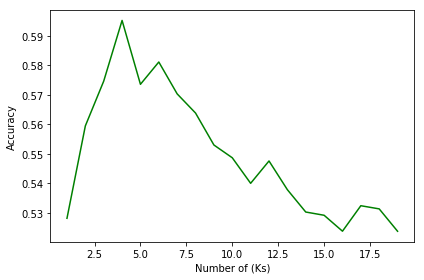

In [95]:
Ks = 20
accuracy_Ks = []
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n)
    # Fit with cross validation
    accuracy_Ks.append(np.mean(cross_val_score(knn, X, y, cv=5)))
    
# plot results
plt.plot(range(1,Ks),accuracy_Ks,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of (Ks)')
plt.tight_layout()
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_score_tf = np.mean(cross_val_score(knn, X, y, cv=10))
knn_score_tf

0.38824838249920535

# SVM

In [37]:
# Additional preprocessing
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

In [17]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm_score_tf = np.mean(cross_val_score(clf, X, y, cv=10))
svm_score_tf

0.8009705004767911

# Decision Tree

In [117]:
clf = DecisionTreeClassifier(random_state=0)
my_winning_model = clf.fit(X, y)
dt_score_tf = np.mean(cross_val_score(clf, X, y, cv=10))
dt_score_tf

0.9411593712510381

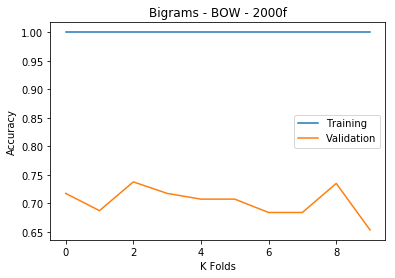

In [128]:
clf = DecisionTreeClassifier(random_state=0)
dt_score_tf = cross_validate(clf, X, y, cv=10,return_train_score=True)
train_s = dt_score_tf['train_score']
test_s = dt_score_tf['test_score']
plt.plot(range(0,10),train_s,label='Training')
plt.plot(range(0,10),test_s,label='Validation')
plt.legend(loc=7)
plt.ylabel('Accuracy')
plt.xlabel('K Folds')
plt.title('Bigrams - BOW - 2000f')
plt.show()

# Naive Bayes

In [66]:
# fit the training dataset on the NB classifier
Naive = MultinomialNB()


scoring = ['accuracy']


#nb_score_tf = cross_val_score(Naive, X, y, cv=10,scoring='f1_macro')
nb_score_tf = cross_validate(Naive, X, y, cv=10,scoring=scoring)

nb_score_tf

/Users/justincharbonneau/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.03466797, 0.01698923, 0.0325911 , 0.015522  , 0.01510191,
        0.03032708, 0.01462293, 0.01472521, 0.01556611, 0.0146172 ]),
 'score_time': array([0.0016849 , 0.00149488, 0.00149298, 0.00137997, 0.00136614,
        0.00132513, 0.00136495, 0.00133491, 0.001369  , 0.00140095]),
 'test_accuracy': array([1.        , 0.98305085, 0.98275862, 0.96551724, 1.        ,
        0.94736842, 0.98245614, 1.        , 0.96491228, 0.96491228]),
 'train_accuracy': array([0.9980695 , 0.9980695 , 0.99807322, 0.99807322, 0.99807322,
        0.99807692, 0.99807692, 0.99807692, 1.        , 0.99807692])}

In [34]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

# Gradient Boosting

In [24]:
xgboost = GradientBoostingClassifier()
xgboost_score_tf = cross_val_score(xgboost, X, y, cv=10,scoring=scoring)
xgboost_score_tf

KeyboardInterrupt: 

# Results

In [41]:
print("----- Count Feature Vector -----\n")
print("K-Nearest Neighbor accuracy:",knn_score)
print("Support Vector Machine accuracy:",svm_score)
print("Decision Tree accuracy:",dt_score)
print("Naive Bayes accuracy:",nb_score)
print("XGBoost accuracy:",xgboost_score)

----- Count Feature Vector -----

K-Nearest Neighbor accuracy: 0.202
Support Vector Machine accuracy: 0.11800000000000002
Decision Tree accuracy: 0.12300000000000003
Naive Bayes accuracy: 0.12500000000000003
XGBoost accuracy: 0.137


In [54]:
print("----- Tf-idf Feature Vector -----\n")
print("K-Nearest Neighbor accuracy:",knn_score_tf)
print("Support Vector Machine accuracy:",svm_score_tf)
print("Decision Tree accuracy:",dt_score_tf)
print("Naive Bayes accuracy:",nb_score_tf)
print("XGBoost accuracy:",xgboost_score_tf)

----- Tf-idf Feature Vector -----

K-Nearest Neighbor accuracy: 0.177
Support Vector Machine accuracy: 0.124
Decision Tree accuracy: 0.11600000000000002
Naive Bayes accuracy: 0.12300000000000003
XGBoost accuracy: 0.138


In [410]:
# Output a pickle file for the model
joblib.dump(my_winning_model, 'my_winning_model.pkl')

['my_winning_model.pkl']

In [411]:
# Load the pickle file
clf_load = joblib.load('my_winning_model.pkl')

In [59]:
test = np.mean(cross_val_score(clf_load, X, y, cv=10))
test

0.11600000000000002

In [447]:
u_in = input("Enter your sentence : ")

Enter your sentence : shine,\n and he knew that it was mine, --\n \n And into my garden stole\n When the night had veiled the pole;\n In the morning, glad, I see\n My foe outstretched beneath the tree.\n \n \n A LITTLE BOY LOST\n \n "Nought loves another as itself,\n   Nor venerates another so,\n Nor is it possible to thought\n   A greater than itself to know.\n \n "And, father, how can I love you \n   Or any of my brothers more?\n I love you like the little bird\n   That picks up crumbs around the door."\n \n The Priest sat by and heard the child;\n   In trembling zeal he seized his hair,\n He led him by his little coat,\n   And all admired the priestly care. \n \n And standing on the altar high,\n   "Lo, what a fiend is here! said he:\n "One who sets reason up for judge\n   Of our most holy mystery."\n \n The weeping child could not be heard,\n   The weeping parents wept in vain:\n They stripped him to his little shirt,\n   And bound him in an iron chain,\n \n And burned him in a hol

In [448]:
user_input = select_random_para(create_para(stem_lem_words(tokenize(u_in))))
user_input

['shine n knew mine n n garden stole n night veiled pole n morning glad see n foe outstretched beneath tree n n n little boy lost n n nought love another n venerates another n possible thought n greater know n n father love n brother n love like little bird n pick crumb around door n n priest sat heard child n trembling zeal seized hair n led little coat n admired priestly care n n standing altar high n lo fiend said n one set reason judge n holy mystery n n weeping child could heard n weeping parent wept vain n stripped little shirt n bound iron chain n n burned holy place n many burned n weeping parent wept vain n thing done albion shore n n n little girl lost n n child future age n reading indignant page n know former']

In [449]:
texts_count_vectorized = pd.DataFrame(c_vectorizer.transform(user_input).toarray())

In [468]:
svd.transform(texts_count_vectorized)

array([[ 4.44536605e-02,  4.09213095e-02,  5.53459242e-03,
        -6.26876886e-02,  1.99737721e-02,  2.39071018e-02,
         4.70178895e-02,  5.19849064e-02,  6.76878134e-03,
         2.51812486e-02, -2.10932408e-02,  3.50923240e-02,
        -7.63730972e-03, -4.59579517e-03,  3.00132801e-02,
        -1.82309567e-02,  3.10861564e-02, -9.33635479e-02,
        -1.83885211e-02,  2.44535557e-02, -4.84804676e-04,
        -1.74433779e-02,  1.22754443e-02,  2.33651255e-02,
         1.18066710e-01,  7.69491568e-02,  1.25185116e-02,
         3.79463829e-02,  3.26982212e-02, -4.69175550e-02,
         4.32839396e-02,  1.30880644e-01,  1.39462244e-01,
        -9.10786228e-02,  7.98691178e-02, -7.28197770e-02,
        -1.10617749e-02, -3.87284578e-02, -1.02410762e-01,
        -6.01648619e-02,  1.82341914e-01,  8.02704991e-02,
        -5.39940465e-02, -8.84390762e-02,  2.97316613e-02,
         7.25824236e-02,  3.06279590e-02, -4.36429263e-02,
         9.83107399e-02, -1.08612613e-01, -5.69399918e-0

In [451]:
clf_load.predict(texts_count_vectorized)

array(['blake-poems'], dtype=object)

# Error Analysis